In [1]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

2024-11-03 17:54:50.572911: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normaliziation better than standardization
x_train_normal = x_train.astype('float32') / 255.0
x_test_normal = x_test.astype('float32') / 255.0

In [4]:
class Convautoencoder(Model):
    def __init__(self):
        super(Convautoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(32, 32, 3)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),  
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2), 
            layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=2),  
            layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2),  
            layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2),  
            layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')                      
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
        

In [5]:
autoencoder1 = Convautoencoder()
autoencoder1.compile(optimizer = 'adam', loss = 'mse')
autoencoder1.fit(x_train_normal, x_train_normal, epochs = 15, 
                 batch_size = 16, shuffle = True, validation_data = (x_test_normal,x_test_normal))

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - loss: 0.0100 - val_loss: 0.0017
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - loss: 0.0011 - val_loss: 7.9511e-04
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - loss: 8.2222e-04 - val_loss: 6.7328e-04
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - loss: 6.7502e-04 - val_loss: 6.4584e-04
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - loss: 5.7913e-04 - val_loss: 5.4789e-04
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - loss: 5.1877e-04 - val_loss: 4.1980e-04
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - loss: 4.6889e-04 - val_loss: 4.9203e-04
Epoch 9/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - loss: 4.3118e-04 - val_loss: 3.8280e-04
Epoch 10/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - loss: 3.9176e-04 - val_loss: 5.2335e-04
Epoch 11/15
3125/3125 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


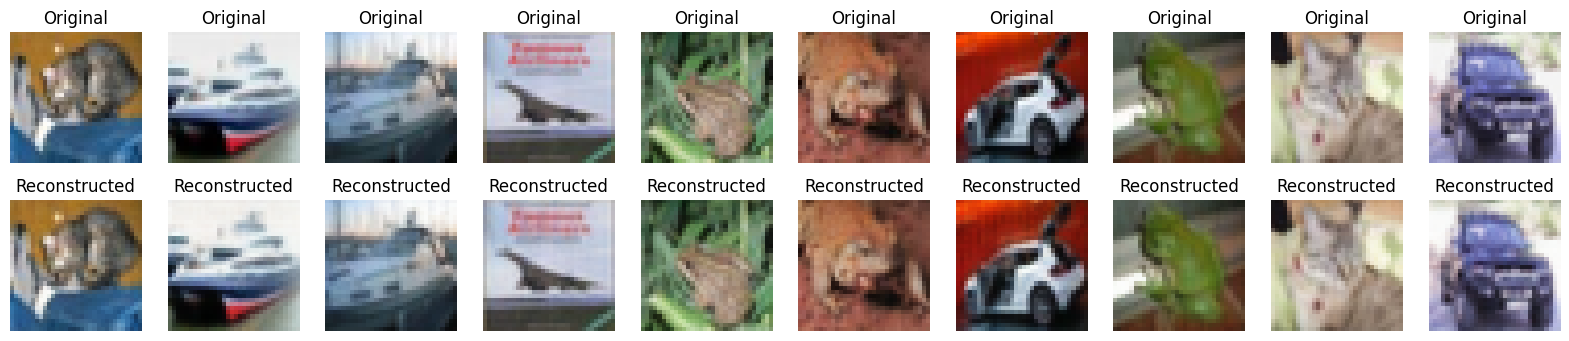

In [7]:
batch = 10
input_img = x_test_normal[0:batch]
output_img = autoencoder1.predict(input_img)

plt.figure(figsize=(20, 4))
for i in range(batch):
    
    ax = plt.subplot(2, batch, i + 1)
    plt.imshow(input_img[i])
    plt.title("Original")
    plt.axis("off")
    
    ax = plt.subplot(2, batch, i + 1 + batch)
    plt.imshow(np.clip(output_img[i], 0, 1))
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

In [ ]:
autoencoder.save("autoencoder_model.h5") 